In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Unnamed: 0,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...,...
8108,8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from seaborn import scatterplot

In [5]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [6]:
x

,Unnamed: 0,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...,...
8108,8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [7]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=432,test_size=0.15,shuffle=True)

In [9]:
len(x_test)

1217

In [10]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=145,test_size=0.2,shuffle=True)

In [11]:
print(len(x_train),len(x_test),len(x_val))

6896 973 244


In [12]:
x_train=x_train.apply(lambda col: col.fillna(col.mean()))
x_test=x_test.apply(lambda col: col.fillna(col.mean()))
x_val=x_val.apply(lambda col: col.fillna(col.mean()))
y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [13]:
x_train.isnull().astype(int).sum()/len(x_train)

Unnamed: 0           0.0
Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [14]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [53]:
lasso=Lasso(alpha=1,max_iter=10000,random_state=777)

In [54]:
lasso.fit(x_train,y_train)

Lasso(alpha=1, max_iter=10000, random_state=777)

In [55]:
y_predict=lasso.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

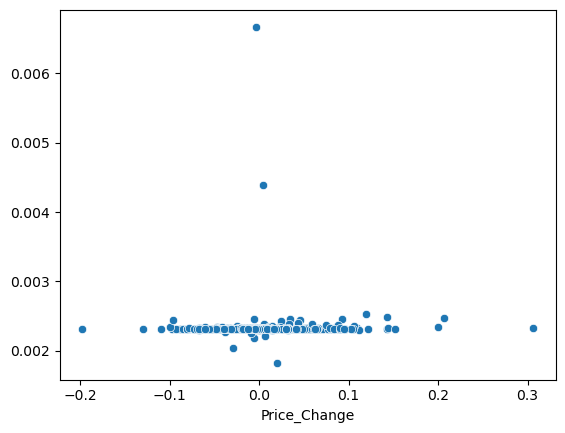

In [56]:
scatterplot(x=y_test,y=y_predict)

In [57]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.03496639254257751

While this initially generates the lowest standard error seen so far. It is because the model is nearly exclusively guessing the same value for every point. Since this value is less than .01 away from the mean of the price change column, its error would seem small, but it is an utterly useless model for this predictor.

Cross Validation Lasso Regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from seaborn import scatterplot

In [97]:
lasso=LassoCV(cv=7)

In [98]:
lasso.fit(x_train,y_train)

LassoCV(cv=7)

In [99]:
y_predict=lasso.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


<Axes: xlabel='Price_Change'>

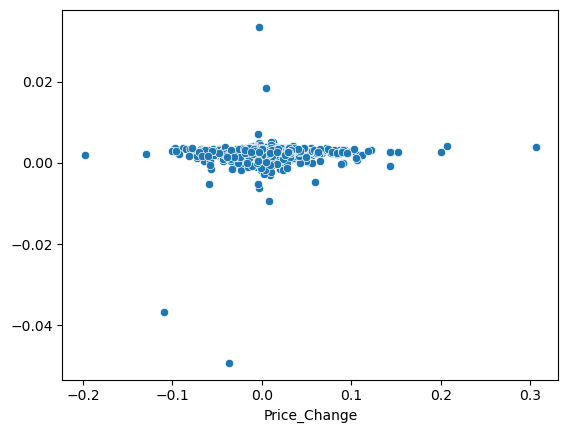

In [100]:
scatterplot(x=y_test,y=y_predict)

In [101]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.034835016404911254

Sensitivity analysis of cv folds

In [104]:
errors=[]
for k in list(range(1,100)):
    lasso=LassoCV(cv=k+1)
    lasso.fit(x_train,y_train)
    y_predict=lasso.predict(x_test.values)
    error=(mean_squared_error(y_test,y_predict)**.5)*100
    errors.append(error)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitte

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitte

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [105]:
min_cv_error=errors.index(min(errors))+2
min_error=errors[min_cv_error-1]
print("A CV fold count of "+str(min_cv_error)+" yields the lowest stanadrd error of "+str(min_error)+"%.")

A CV fold count of 4 yields the lowest stanadrd error of 3.4835016404911254%.


Final Evaluation of Model

In [106]:
lasso=LassoCV(cv=4)
lasso.fit(x_train,y_train)
y_evaluation=lasso.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [107]:
print(error)

3.677750154532042


In [108]:
print((-1.96*error),(1.96*error))

-7.208390302882802 7.208390302882802
